### pandas 다루기
- 행과 열을 가지는 표와 같은 형태의 데이터를 다루는 라이브러리 (like 엑셀)
    - 데이터 구조
      - Series : 1차원 배열형태(인덱스와 값을 1대 1로 대응하는 형태)
      - DataFrame : 2차원 배열형태(행과 열을 가지는 표와같은 형태)
      - 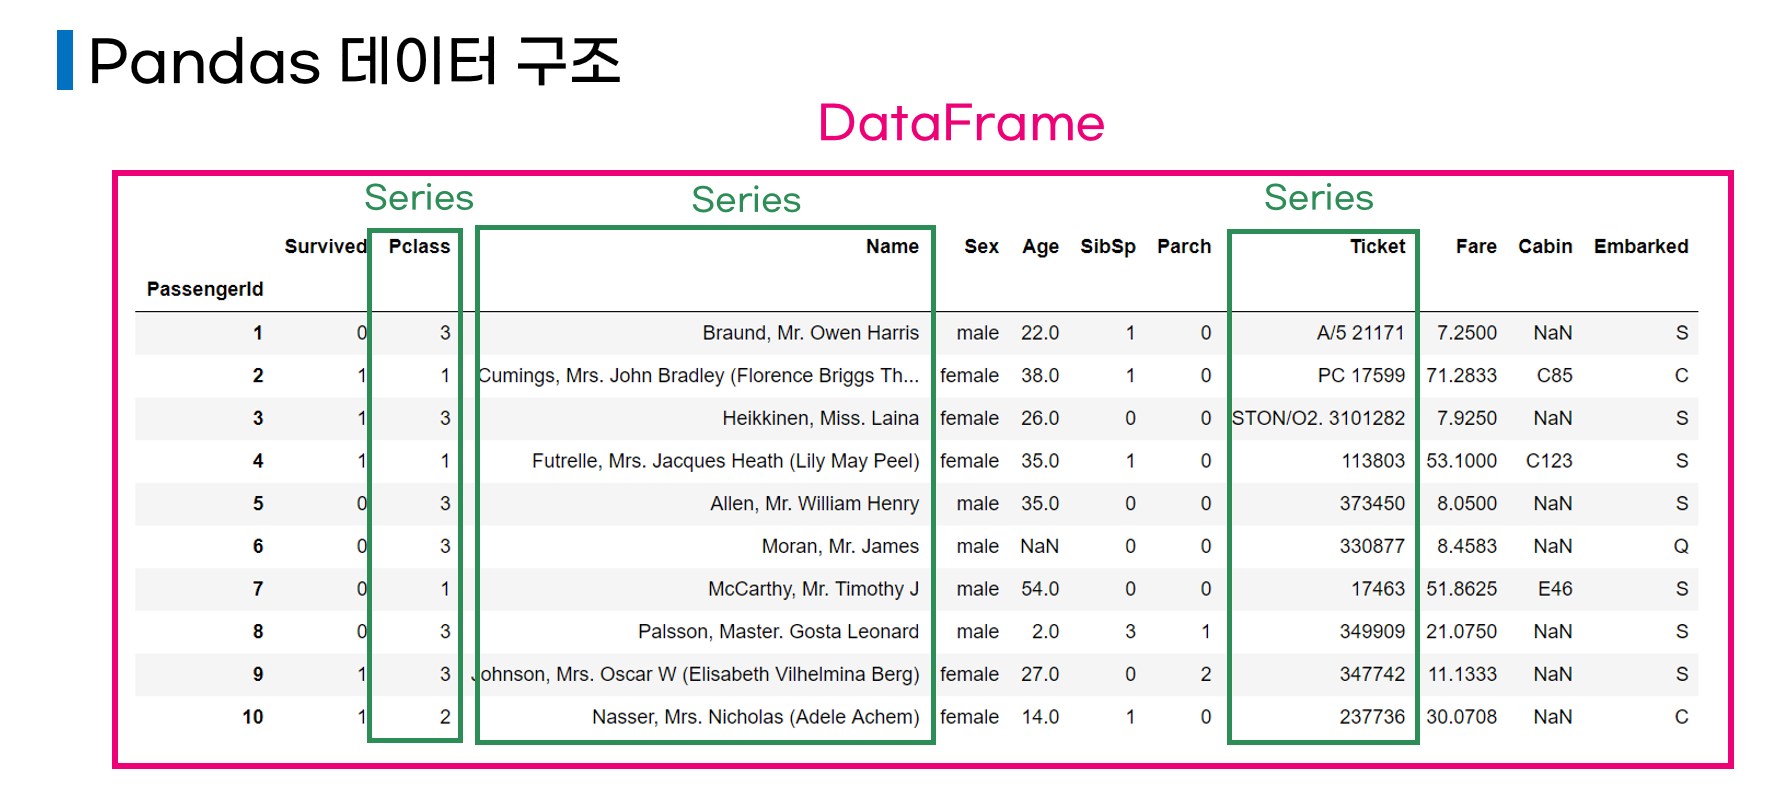
      - 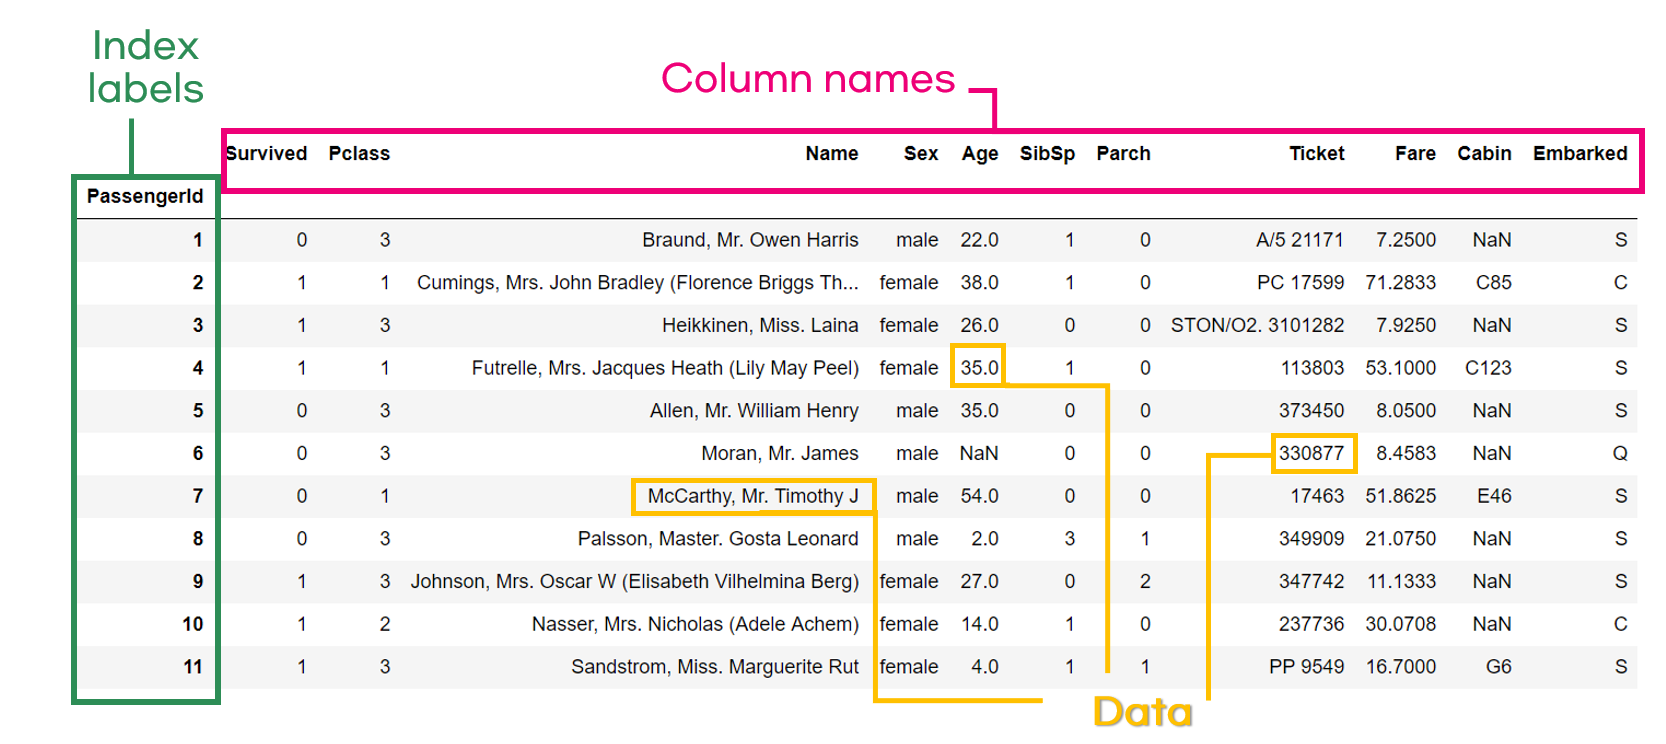

In [ ]:
#판다스의 인덱스는 의미가 조금다름
#index -> 행을 색인할 수 있는 개념
#column -> 열을 색인할 수 있는 개념

In [ ]:
#설치방법
!pip install pandas

In [3]:
import pandas as pd

In [1]:
#넘파이와 다른점!
import numpy as np
arr = np.array([90,85,88])
print(arr)

[90 85 88]


In [4]:
#시리즈
s = pd.Series([90,85,88], index = ['국어','영어','수학'])
print(s)

국어    90
영어    85
수학    88
dtype: int64


In [5]:
#데이터프레임 -> 시리즈를 여러개 모아서 표처럼 만드는 배열형태
data = {
    '국어': [90, 80],
    '영어': [85, 88],
    '수학': [88, 95]
}
df=pd.DataFrame(data,index=["홍길동","임꺽정"])
print(df)

     국어  영어  수학
홍길동  90  85  88
임꺽정  80  88  95


### Series (시리즈)
- 1차원 배열형태

In [6]:
team_name = pd.Series(["이도연","손지영","김미희","임보미"])
team_name

0    이도연
1    손지영
2    김미희
3    임보미
dtype: object

In [7]:
#원래 시리즈의 데이터타입은 object -> 모든걸포괄
#시리즈의 데이터 타입 변경하기
team_name_str = team_name.astype("string")
team_name_str

In [9]:
team_MBTI = pd.Series(["ENFJ","ENFP","ISTJ","ESFP"])
team_MBTI

0    ENFJ
1    ENFP
2    ISTJ
3    ESFP
dtype: object

In [10]:
team_MBTI = pd.Series(["ENFJ","ENFP","ISTJ","ESFP"],
                     index = ["이도연","손지영","김미희","임보미"])
team_MBTI

이도연    ENFJ
손지영    ENFP
김미희    ISTJ
임보미    ESFP
dtype: object

In [11]:
team_MBTI = pd.Series(["ENFJ","ENFP","ISTJ","ESFP"],
                     index = team_name)
team_MBTI

이도연    ENFJ
손지영    ENFP
김미희    ISTJ
임보미    ESFP
dtype: object

In [12]:
#딕셔너리로 인덱스(키), 데이터(밸류)를 부여할 수 있다 
team_MBTI2 = pd.Series({'이도연':'ENFJ','임보미':'ENFP'})
team_MBTI2 

이도연    ENFJ
임보미    ENFP
dtype: object

In [13]:
team_name

0    이도연
1    손지영
2    김미희
3    임보미
dtype: object

In [15]:
#인덱싱 -> 필요한 데이터만 색인하기! : 시리즈명["인덱스명"]
print(team_name[0])
print(team_MBTI2["이도연"])

이도연
ENFJ


In [19]:
#Series의 속성값 확인하기
print(team_MBTI.index) #인덱스 명
print(team_MBTI.values) #데이터 값
print(team_MBTI.size) #몇개의 데이터가 들어있는가
print(team_MBTI.dtype) #데이터의 자료형

Index(['이도연', '손지영', '김미희', '임보미'], dtype='object')
['ENFJ' 'ENFP' 'ISTJ' 'ESFP']
4
object


In [22]:
#시리즈에 이름 지정하기
team_MBTI.name = "팀 MBTI"
#인덱스에 이름 지정하기
team_MBTI.index.name = "이름"
team_MBTI

이름
이도연    ENFJ
손지영    ENFP
김미희    ISTJ
임보미    ESFP
Name: 팀 MBTI, dtype: object

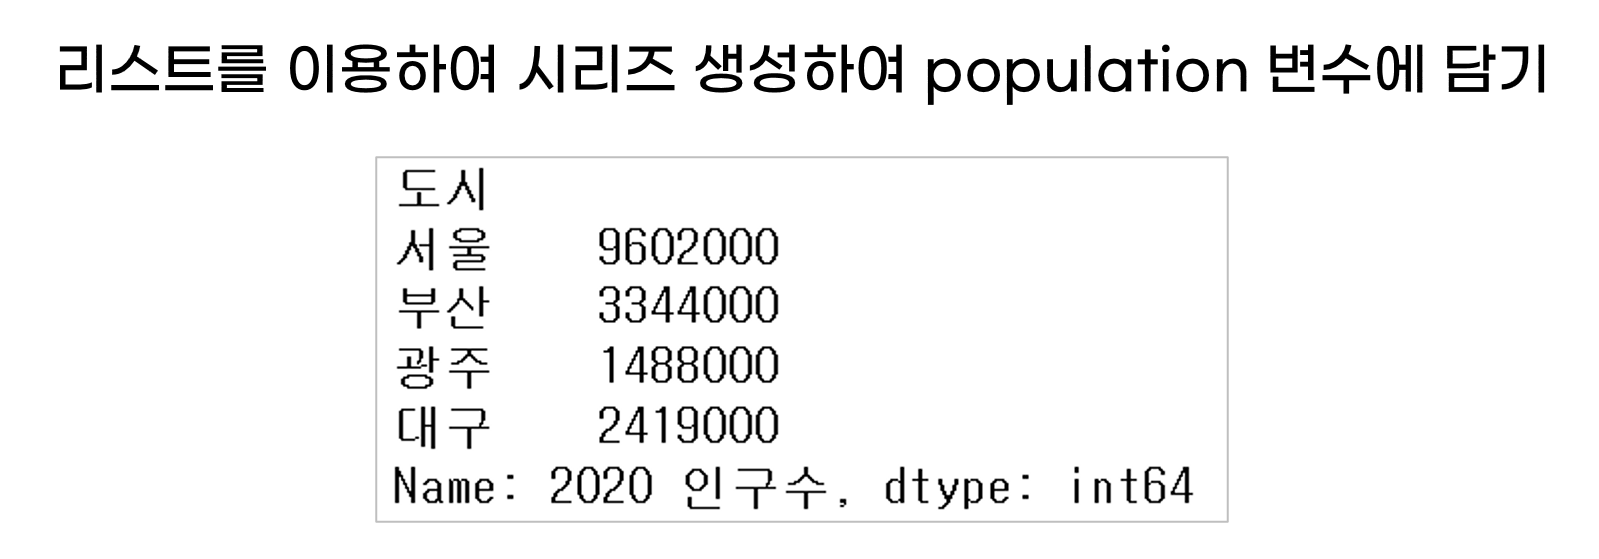

In [28]:
#리스트로 시리즈 생성하기
population = pd.Series([9602000,3344000,1488000,2419000],
                      ["서울","부산","광주","대구"])
population.name = "2020 인구수"
population.index.name = "도시"
population

도시
서울    9602000
부산    3344000
광주    1488000
대구    2419000
Name: 2020 인구수, dtype: int64

In [29]:
#딕셔너리로 시리즈 생성하기
population = pd.Series({"서울":9602000,"부산":3344000,"광주":1488000,"대구":2419000})
population.name = "2020 인구수"
population.index.name = "도시"
population

도시
서울    9602000
부산    3344000
광주    1488000
대구    2419000
Name: 2020 인구수, dtype: int64

#### Series 데이터 수정, 추가, 삭제

In [33]:
#데이터 수정
#부산 -> 3500000
population["부산"] = 3500000
print(population["부산"])
population

3500000


도시
서울    9602000
부산    3500000
광주    1488000
대구    2419000
Name: 2020 인구수, dtype: int64

In [40]:
#대전 -> 1500000 추가
population["대전"] = 1500000
population

도시
부산    3500000
광주    1488000
대구    2419000
대전    1500000
Name: 2020 인구수, dtype: int64

In [35]:
#데이터 삭제 방법1 -> del키워드 : 바로 삭제
del population['서울']
population

도시
부산    3500000
광주    1488000
대구    2419000
대전    1500000
Name: 2020 인구수, dtype: int64

In [38]:
#데이터 삭제 방법2 -> drop()함수 : 삭제가 신중해야하기때문에 미리 한번 보여준다!
#진짜 삭제하고싶다면 변수에 다시 담아줘야한다!
population = population.drop("대전")

In [41]:
population

도시
부산    3500000
광주    1488000
대구    2419000
대전    1500000
Name: 2020 인구수, dtype: int64

In [42]:
#변수 대입 없이 바로 지우려면 속성을 활용해서 적용할 수 있다 (inplace = True)
population.drop("대전", inplace=True)

In [43]:
population

도시
부산    3500000
광주    1488000
대구    2419000
Name: 2020 인구수, dtype: int64

#### Series의 연산

In [44]:
#리스트로 시리즈 생성하기
population = pd.Series([9602000,3344000,1488000,2419000],
                      ["서울","부산","광주","대구"])
population.name = "2020 인구수"
population.index.name = "도시"
population

도시
서울    9602000
부산    3344000
광주    1488000
대구    2419000
Name: 2020 인구수, dtype: int64

In [45]:
population.values

array([9602000, 3344000, 1488000, 2419000])

In [46]:
#백만으로 나눠서 몫 가져오기! (//)
population//1000000

도시
서울    9
부산    3
광주    1
대구    2
Name: 2020 인구수, dtype: int64

In [47]:
#포켓몬이름:능력치
data = {'피카츄':9631,'꼬부기':3393,
        '파이리':1490,'이상해씨':2632}
pokemon = pd.Series(data)
pokemon

피카츄     9631
꼬부기     3393
파이리     1490
이상해씨    2632
dtype: int64

In [48]:
#레벨업한 데이터가 들어있는 pokemon_up Series
data2 = {'피카츄':9904,'꼬부기':3448,
         '이브이':2466,'뮤':2890}
pokemon_up = pd.Series(data2)
pokemon_up

피카츄    9904
꼬부기    3448
이브이    2466
뮤      2890
dtype: int64

In [49]:
#포켓몬의 올라간 능력치를 계산해보자!
#인덱스명이 달라졌을 때 Series는 어떻게 연산을할까? -> NaN(Not a Number)결측치
attack = pokemon_up-pokemon
attack

꼬부기      55.0
뮤         NaN
이브이       NaN
이상해씨      NaN
파이리       NaN
피카츄     273.0
dtype: float64

In [50]:
#비어있는 데이터 보고싶지않다면? -> notnull()
attack.notnull()

꼬부기      True
뮤       False
이브이     False
이상해씨    False
파이리     False
피카츄      True
dtype: bool

In [51]:
#불리언인덱싱
attack[attack.notnull()]

꼬부기     55.0
피카츄    273.0
dtype: float64

In [52]:
#비어있는 데이터들만 보고싶다면? -> isnull()
attack[attack.isnull()]

뮤      NaN
이브이    NaN
이상해씨   NaN
파이리    NaN
dtype: float64

In [53]:
#레벨업해서 올라간 공격력의 증가율(%) 계산해보기!(NaN표시되지않게)
#(올라간데이터-원래데이터)/원래데이터 * 100
ch = (pokemon_up-pokemon)/pokemon * 100
ch

꼬부기     1.620984
뮤            NaN
이브이          NaN
이상해씨         NaN
파이리          NaN
피카츄     2.834597
dtype: float64

In [55]:
ch[ch.notnull()]

꼬부기    1.620984
피카츄    2.834597
dtype: float64

#### Series 인덱싱, 슬라이싱

In [56]:
population

도시
서울    9602000
부산    3344000
광주    1488000
대구    2419000
Name: 2020 인구수, dtype: int64

In [58]:
#부산 값 가져오기
print(population["부산"])

3344000


In [61]:
#여러 도시 값 가져오기 -> 대괄호 한번 더 묶어준다
#서울, 광주, 부산
print(population[["서울","광주","부산"]])

도시
서울    9602000
광주    1488000
부산    3344000
Name: 2020 인구수, dtype: int64


In [64]:
#슬라이싱 -> 부산~광주
#print(population[1:3]) #인덱스 번호로 가져올때는 끝 인덱스+1
print(population['부산':'광주']) #인덱스 이름으로 가져올 때는 가져오고싶은 끝 인덱스 이름 입력하기

도시
부산    3344000
광주    1488000
Name: 2020 인구수, dtype: int64


#### 불리언인덱싱

In [66]:
#인구가 250만 이상인 도시만 추출!
population[population>=2500000]

도시
서울    9602000
부산    3344000
Name: 2020 인구수, dtype: int64

### DataFrame
- 행과 열로 구성되어있는 2차원 데이터

In [67]:
pd.DataFrame(["이도연","손지영","임보미"])

,0
0,이도연
1,손지영
2,임보미


In [74]:
#여러개의 정보를 넣어 표로 만들 수 있다
team_info = pd.DataFrame([["이도연","ENFJ","여자"],
                         ["손지영","ISTP","여자"],
                         ["김미희","ISTJ","여자"],
                         ["임보미","ESFP","여자"]],
                        index = ['1번','2번','3번','4번'],
                        columns = ['이름','MBTI','성별'])
team_info.index.name = "번호"
team_info

,이름,MBTI,성별
번호,,,
1번,이도연,ENFJ,여자
2번,손지영,ISTP,여자
3번,김미희,ISTJ,여자
4번,임보미,ESFP,여자


In [75]:
#행과 열 바꾸기 transpose -> T
team_info.T

번호,1번,2번,3번,4번
이름,이도연,손지영,김미희,임보미
MBTI,ENFJ,ISTP,ISTJ,ESFP
성별,여자,여자,여자,여자


In [82]:
#DataFrame의 각각의 속성값 확인하기
print(team_info.index)
print(team_info.values)
print(team_info.columns)
print(team_info.size)
print(team_info.dtypes) #데이터프레임의 자료형은 시리즈형태로 보고있다!

Index(['1번', '2번', '3번', '4번'], dtype='object', name='번호')
[['이도연' 'ENFJ' '여자']
 ['손지영' 'ISTP' '여자']
 ['김미희' 'ISTJ' '여자']
 ['임보미' 'ESFP' '여자']]
Index(['이름', 'MBTI', '성별'], dtype='object')
12
이름      object
MBTI    object
성별      object
dtype: object


In [83]:
team_info

,이름,MBTI,성별
번호,,,
1번,이도연,ENFJ,여자
2번,손지영,ISTP,여자
3번,김미희,ISTJ,여자
4번,임보미,ESFP,여자


In [84]:
#열 인덱싱하기 -> 시리즈형태로 인덱싱 -> []
team_info['이름']

번호
1번    이도연
2번    손지영
3번    김미희
4번    임보미
Name: 이름, dtype: object

In [85]:
#열 인덱싱하기 -> 데이터프레임 형태로 인덱싱 -> [[]]
team_info[['이름']]

,이름
번호,
1번,이도연
2번,손지영
3번,김미희
4번,임보미


In [88]:
#여러개의 열을 가지고 올 때 -> 시리즈 여러개 모여있는 형태이니 데이터프레임형태로만 가져올 수 있다!
team_info[['이름','MBTI']]

,이름,MBTI
번호,,
1번,이도연,ENFJ
2번,손지영,ISTP
3번,김미희,ISTJ
4번,임보미,ESFP


In [ ]:
#열 슬라이싱은 안됨!

#### DataFrame의 행,열 추가, 수정, 삭제 

In [89]:
team_info

,이름,MBTI,성별
번호,,,
1번,이도연,ENFJ,여자
2번,손지영,ISTP,여자
3번,김미희,ISTJ,여자
4번,임보미,ESFP,여자


In [90]:
team_info["나이"] = [20,25,19,30]
team_info

,이름,MBTI,성별,나이
번호,,,,
1번,이도연,ENFJ,여자,20
2번,손지영,ISTP,여자,25
3번,김미희,ISTJ,여자,19
4번,임보미,ESFP,여자,30


In [ ]:
#새로운 행을 추가하고싶다면? -> 행 인덱싱을 해야함 -> 행인덱싱안됨..

In [93]:
#삭제 -> drop() : 미리보기로 삭제해준다!
#행삭제
team_info.drop('4번',axis=0) #axis=0(default값) : 행

,이름,MBTI,성별,나이
번호,,,,
1번,이도연,ENFJ,여자,20
2번,손지영,ISTP,여자,25
3번,김미희,ISTJ,여자,19


In [94]:
#열삭제
team_info.drop("성별",axis=1)  #axis=1 : 열

,이름,MBTI,나이
번호,,,
1번,이도연,ENFJ,20
2번,손지영,ISTP,25
3번,김미희,ISTJ,19
4번,임보미,ESFP,30


In [96]:
#여러개의 열을 삭제할때 리스트로 만들어서 넣어준다!
team_info.drop(['MBTI','성별'],axis=1)

,이름,나이
번호,,
1번,이도연,20
2번,손지영,25
3번,김미희,19
4번,임보미,30


In [100]:
#선택하여 열 이름 변경하기 -> rename()
team_info.rename(columns={'이름':'name'},inplace=True)

In [102]:
#선택하여 행 이름 변경하기 -> rename()
team_info.rename(index={'1번':'No.1'},inplace=True)

In [103]:
team_info

,name,MBTI,성별,나이
번호,,,,
No.1,이도연,ENFJ,여자,20
2번,손지영,ISTP,여자,25
3번,김미희,ISTJ,여자,19
4번,임보미,ESFP,여자,30


In [ ]:
# 새롭게 데이터프레임 생성하기

In [2]:
#팀원 세명의 정보를 입력하기
#이름, 성별, 나이
import pandas as pd
team = pd.DataFrame([["이도연","여자",20],
                    ["손지영","여자",25],
                     ["김미희","여자",27]],
                   index = ["1번","2번","3번"],
                   columns = ['이름','성별','나이'])
team

,이름,성별,나이
1번,이도연,여자,20
2번,손지영,여자,25
3번,김미희,여자,27


In [4]:
#딕셔너리-> 키:컬럼명, 밸류:데이터
team_dic = pd.DataFrame({'이름':['이도연','손지영','김미희'],
                        '성별':['여자','여자','여자'],
                        '나이':[20,25,27]},index=["1번","2번","3번"])
team_dic

,이름,성별,나이
1번,이도연,여자,20
2번,손지영,여자,25
3번,김미희,여자,27


In [7]:
#행 슬라이싱
#team[0:2] #인덱스번호로 가능
team["1번":"2번"] #인덱스명으로 가능

,이름,성별,나이
1번,이도연,여자,20
2번,손지영,여자,25


In [6]:
#행 인덱싱 -> 불가능
team[0]

KeyError: 0

In [8]:
#열 슬라이싱 -> 안됨
team["이름":"성별"]

,이름,성별,나이


In [9]:
#열 인덱싱 -> DF명[컬럼명]
team["이름"]

1번    이도연
2번    손지영
3번    김미희
Name: 이름, dtype: object

### 인덱서 등장!
- 데이터프레임의 행, 열에 편리한 접근 위해 존재
- loc,iloc
- loc : 실제로 보이는 이름으로 데이터 접근
- iloc : 인덱스 번호로 데이터 접근
- .인덱서[행,열]

In [13]:
team

,이름,성별,나이
1번,이도연,여자,20
2번,손지영,여자,25
3번,김미희,여자,27


In [12]:
#행 인덱싱 -> 인덱서로 인덱싱 가능
#team.loc['1번']
team.iloc[0]

이름    이도연
성별     여자
나이     20
Name: 1번, dtype: object

In [14]:
team.loc['4번'] = ["정형","남자",30]

In [15]:
team

,이름,성별,나이
1번,이도연,여자,20
2번,손지영,여자,25
3번,김미희,여자,27
4번,정형,남자,30


In [17]:
#열 슬라이싱
#team.iloc[0:2,0:2]
team.loc["1번":"2번","이름":"성별"]

,이름,성별
1번,이도연,여자
2번,손지영,여자


In [18]:
team.loc['1번','이름'] #행,열

'이도연'